In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv("FDI_in_India (1).csv")

In [5]:
data = dataset.copy()

In [6]:
data.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [7]:
data.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

#It is apparent that the whole data contains non-null values and is clean

Find out each year the sector recieving highest FDI 

In [8]:
data.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [9]:
max_invest = pd.DataFrame(columns=['Sector', 'Value','Year'])

for i in data:
    if data[i].dtype == 'float':
        max_value = data[i].max()
        max_sectors = data.loc[data[i] == max_value, 'Sector']
        for sector in max_sectors:
            max_invest = max_invest.append({'Sector': sector, 'Value': max_value,'Year':i}, ignore_index=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_11640\118111085.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_invest = max_invest.append({'Sector': sector, 'Value': max_value,'Year':i}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\118111085.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_invest = max_invest.append({'Sector': sector, 'Value': max_value,'Year':i}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\118111085.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_invest = max_invest.append({'Sector': sector, 'Value': max_value,'Year':i}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11640\118111085.py:8: FutureWarning: The frame.append method is depr

In [10]:
max_invest.head()

,Sector,Value,Year
0,MISCELLANEOUS INDUSTRIES,832.07,2000-01
1,TELECOMMUNICATIONS,873.23,2001-02
2,AUTOMOBILE INDUSTRY,419.96,2002-03
3,COMPUTER SOFTWARE & HARDWARE,368.32,2003-04
4,COMPUTER SOFTWARE & HARDWARE,527.90,2004-05


In [11]:
max_invest.set_index('Year')

,Sector,Value
Year,,
2000-01,MISCELLANEOUS INDUSTRIES,832.07
2001-02,TELECOMMUNICATIONS,873.23
2002-03,AUTOMOBILE INDUSTRY,419.96
2003-04,COMPUTER SOFTWARE & HARDWARE,368.32
2004-05,COMPUTER SOFTWARE & HARDWARE,527.90
2005-06,COMPUTER SOFTWARE & HARDWARE,1359.97
2006-07,SERVICES SECTOR,4713.78
2007-08,SERVICES SECTOR,6986.17
2008-09,SERVICES SECTOR,6183.49


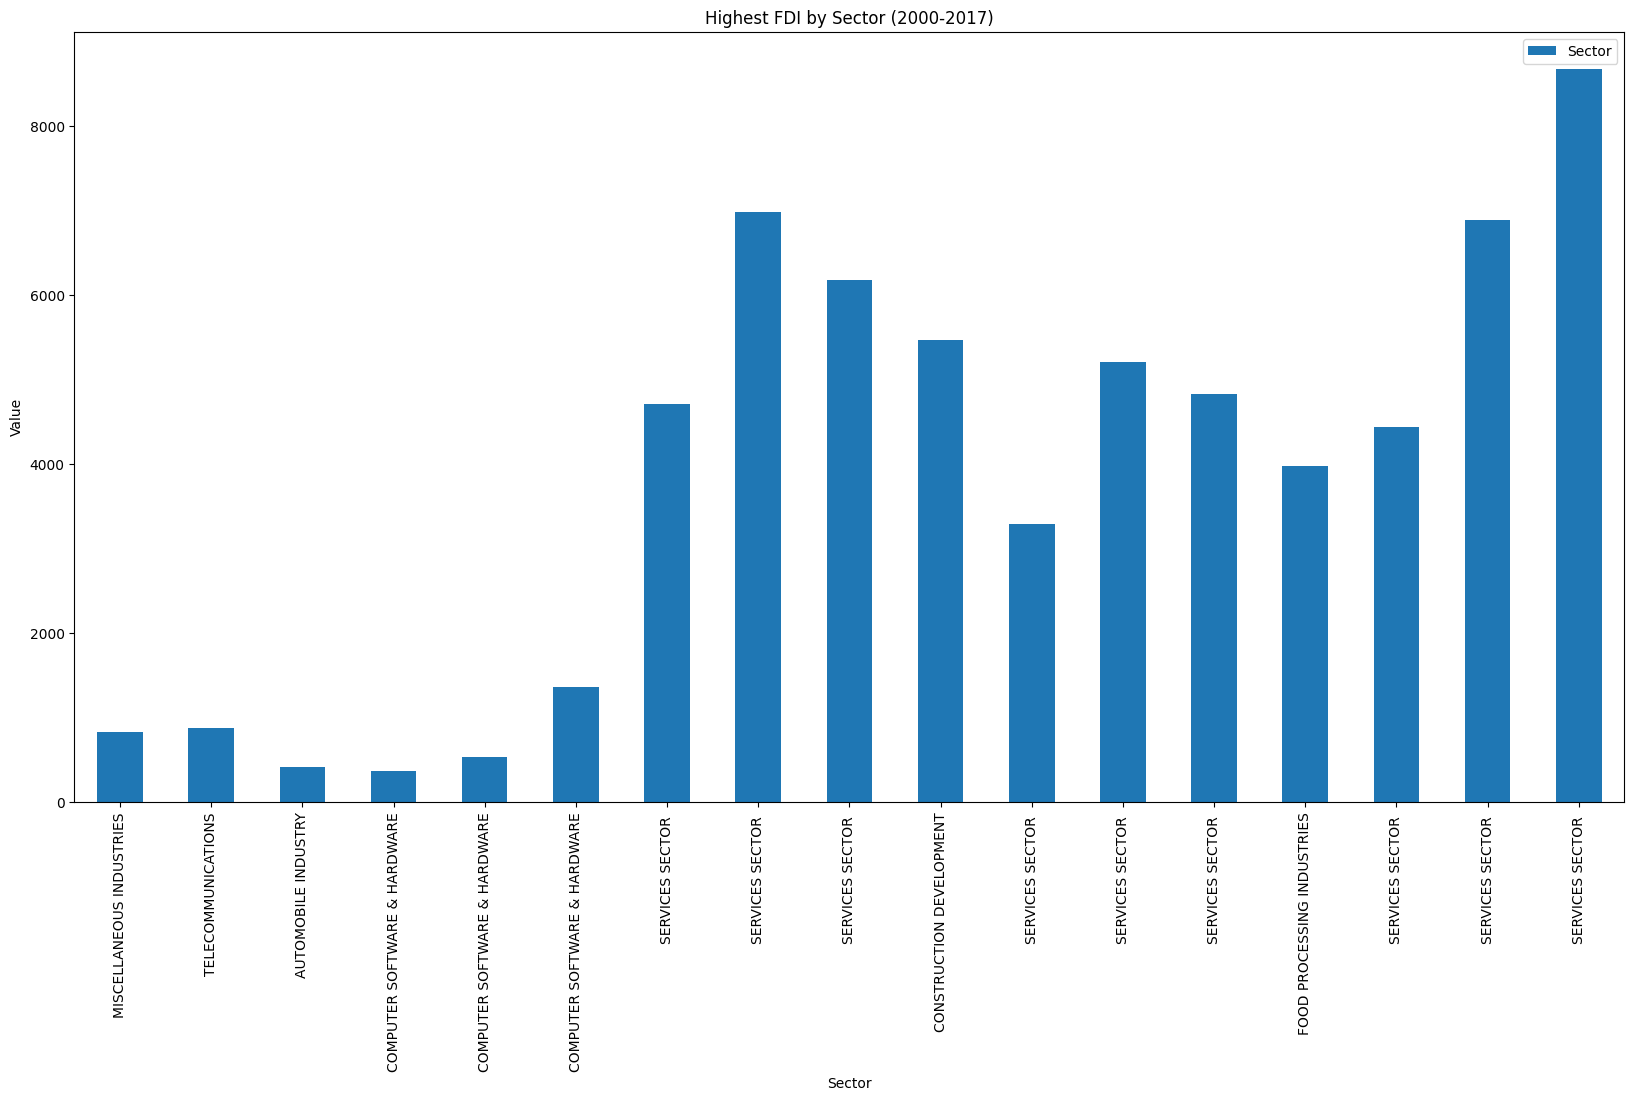

In [12]:
max_invest.plot(kind='bar',x='Sector', y='Value', label='Sector', figsize=(20,10))
plt.title('Highest FDI by Sector (2000-2017)')
plt.xlabel('Sector')
plt.ylabel('Value')

plt.show()

Here we found the sector recieving maximum FDI in a particular year

In [13]:
#Taking the mean FDI of each sector and storing it in a list
mean = []
for i in range(0,63):
    mean.append(round(data.loc[i][1:17].values.mean(),2))
print(mean)

[555.65, 138.5, 654.76, 274.87, 1.73, 417.24, 8.83, 90.71, 271.04, 1313.61, 102.25, 1148.9, 311.06, 941.54, 58.19, 123.59, 102.33, 44.44, 254.04, 52.37, 27.13, 21.07, 191.76, 21.63, 68.57, 4.71, 11.14, 0.5, 35.3, 743.77, 4.2, 4.86, 865.59, 115.78, 68.36, 11.78, 148.56, 425.98, 36.82, 69.46, 130.27, 10.31, 2.36, 31.24, 46.54, 194.32, 9.22, 0.32, 209.79, 3174.53, 224.51, 78.5, 576.71, 742.03, 33.6, 115.27, 48.25, 6.85, 36.34, 0.25, 497.3, 1511.75, 609.19]


In [14]:
#Taking the sector and storing them in a list
sector = []
for i in data['Sector']:
        sector.append(i)
print(sector)

['METALLURGICAL INDUSTRIES', 'MINING', 'POWER', 'NON-CONVENTIONAL ENERGY', 'COAL PRODUCTION', 'PETROLEUM & NATURAL GAS', 'BOILERS AND STEAM GENERATING PLANTS', 'PRIME MOVER', 'ELECTRICAL EQUIPMENTS', 'COMPUTER SOFTWARE & HARDWARE', 'ELECTRONICS', 'TELECOMMUNICATIONS', 'INFORMATION & BROADCASTING', 'AUTOMOBILE INDUSTRY', 'AIR TRANSPORT', 'SEA TRANSPORT', 'PORTS', 'RAILWAY RELATED COMPONENTS', 'INDUSTRIAL MACHINERY', 'MACHINE TOOLS', 'AGRICULTURAL MACHINERY', 'EARTH-MOVING MACHINERY', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES', 'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS', 'MEDICAL AND SURGICAL APPLIANCES', 'INDUSTRIAL INSTRUMENTS', 'SCIENTIFIC INSTRUMENTS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS', 'FERTILIZERS', 'CHEMICALS (OTHER THAN FERTILIZERS)', 'PHOTOGRAPHIC RAW FILM AND PAPER', 'DYE-STUFFS', 'DRUGS & PHARMACEUTICALS', 'TEXTILES (INCLUDING DYED,PRINTED)', 'PAPER AND PULP', 'SUGAR', 'FERMENTATION INDUSTRIES', 'FOOD PROCESSING INDUSTRIES', 'VEGETABLE OILS AND VANASPA

In [15]:
#Making dictionary with sector and mean FDI
sector_mean = {}
for i in range(len(sector)):
    sector_mean[sector[i]] = mean[i]
print(sector_mean)

{'METALLURGICAL INDUSTRIES': 555.65, 'MINING': 138.5, 'POWER': 654.76, 'NON-CONVENTIONAL ENERGY': 274.87, 'COAL PRODUCTION': 1.73, 'PETROLEUM & NATURAL GAS': 417.24, 'BOILERS AND STEAM GENERATING PLANTS': 8.83, 'PRIME MOVER': 90.71, 'ELECTRICAL EQUIPMENTS': 271.04, 'COMPUTER SOFTWARE & HARDWARE': 1313.61, 'ELECTRONICS': 102.25, 'TELECOMMUNICATIONS': 1148.9, 'INFORMATION & BROADCASTING': 311.06, 'AUTOMOBILE INDUSTRY': 941.54, 'AIR TRANSPORT': 58.19, 'SEA TRANSPORT': 123.59, 'PORTS': 102.33, 'RAILWAY RELATED COMPONENTS': 44.44, 'INDUSTRIAL MACHINERY': 254.04, 'MACHINE TOOLS': 52.37, 'AGRICULTURAL MACHINERY': 27.13, 'EARTH-MOVING MACHINERY': 21.07, 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES': 191.76, 'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS': 21.63, 'MEDICAL AND SURGICAL APPLIANCES': 68.57, 'INDUSTRIAL INSTRUMENTS': 4.71, 'SCIENTIFIC INSTRUMENTS': 11.14, 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS': 0.5, 'FERTILIZERS': 35.3, 'CHEMICALS (OTHER THAN FERTILIZERS)': 743.77, 'PHO

In [16]:
Sector_mean =  pd.DataFrame(list(sector_mean.items()),columns=['Sector','Average FDI'])

Sector_mean is the mean of each sector's FDI from 2000-2017

In [17]:
Sector_mean

,Sector,Average FDI
0,METALLURGICAL INDUSTRIES,555.65
1,MINING,138.50
2,POWER,654.76
3,NON-CONVENTIONAL ENERGY,274.87
4,COAL PRODUCTION,1.73
...,...,...
58,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,36.34
59,COIR,0.25
60,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,497.30
61,CONSTRUCTION DEVELOPMENT,1511.75


In [18]:
#Sector with the highest mean FDI
Sector_mean[Sector_mean['Average FDI'] == Sector_mean['Average FDI'].max()]

,Sector,Average FDI
49,SERVICES SECTOR,3174.53


In [19]:
#Sector with lowest lowest mean FDI
Sector_mean[Sector_mean['Average FDI'] == Sector_mean['Average FDI'].min()]

,Sector,Average FDI
59,COIR,0.25


In [20]:
data.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

Find relationship b/w FDI and GDP

In [21]:
gdp_data = pd.read_csv('gdp_data.csv')

In [22]:
gdp_data.head()

,Year,GDP ( Billions of US $)
0,2001,485.441014
1,2002,514.937949
2,2003,607.699285
3,2004,709.148515
4,2005,820.381596


In [23]:
data.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


We modified the data in power query and stored the FDI w.r.t to Sector in modified_data.csv

In [24]:
modified_data = pd.read_csv('modified_data.csv')

In [25]:
modified_data.columns

Index(['Year', 'METALLURGICAL INDUSTRIES', 'MINING', 'POWER',
       'NON-CONVENTIONAL ENERGY', 'COAL PRODUCTION', 'PETROLEUM & NATURAL GAS',
       'BOILERS AND STEAM GENERATING PLANTS', 'PRIME MOVER',
       'ELECTRICAL EQUIPMENTS', 'COMPUTER SOFTWARE & HARDWARE', 'ELECTRONICS',
       'TELECOMMUNICATIONS', 'INFORMATION & BROADCASTING',
       'AUTOMOBILE INDUSTRY', 'AIR TRANSPORT', 'SEA TRANSPORT', 'PORTS',
       'RAILWAY RELATED COMPONENTS', 'INDUSTRIAL MACHINERY', 'MACHINE TOOLS',
       'AGRICULTURAL MACHINERY', 'EARTH-MOVING MACHINERY',
       'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES',
       'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS',
       'MEDICAL AND SURGICAL APPLIANCES', 'INDUSTRIAL INSTRUMENTS',
       'SCIENTIFIC INSTRUMENTS',
       'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS', 'FERTILIZERS',
       'CHEMICALS (OTHER THAN FERTILIZERS)', 'PHOTOGRAPHIC RAW FILM AND PAPER',
       'DYE-STUFFS', 'DRUGS & PHARMACEUTICALS',
       'TEXTILES (INCLUDING DYED,PRI

In [26]:
Year = [2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011,2012, 2013, 2014, 2015, 2016, 2017]

In [28]:
modified_data = modified_data.assign(Year=Year)
modified_data.to_csv('modified_data.csv')

In [29]:
pd.read_csv('modified_data.csv').head()

,Unnamed: 0,Year,METALLURGICAL INDUSTRIES,MINING,POWER,NON-CONVENTIONAL ENERGY,COAL PRODUCTION,PETROLEUM & NATURAL GAS,BOILERS AND STEAM GENERATING PLANTS,PRIME MOVER,...,RETAIL TRADING,AGRICULTURE SERVICES,"DIAMOND,GOLD ORNAMENTS",TEA AND COFFEE,PRINTING OF BOOKS,COIR,CONSTRUCTION ACTIVITIES,CONSTRUCTION DEVELOPMENT,MISCELLANEOUS INDUSTRIES,Year.1
0,0,2001,22.69,1.32,89.42,0.00,0.00,9.35,0.00,0.00,...,0.0,17.52,18.83,20.23,0.00,0.00,0.0,24.33,832.07,2001
1,1,2002,14.14,6.52,757.44,0.00,0.00,211.07,0.00,0.00,...,0.0,14.06,0.36,0.14,0.00,0.00,0.0,51.75,221.37,2002
2,2,2003,36.61,10.06,59.11,1.70,0.00,56.78,0.00,0.00,...,0.0,11.01,1.30,0.00,6.30,0.00,0.0,36.10,218.76,2003
3,3,2004,8.11,23.48,27.09,4.14,0.04,80.64,0.04,0.00,...,0.0,0.59,1.96,0.32,0.00,0.00,0.0,47.04,235.48,2004
4,4,2005,200.38,9.92,43.37,1.27,0.00,102.78,0.54,2.66,...,0.0,3.83,8.58,0.01,0.06,0.47,0.0,152.06,121.83,2005


In [30]:
#Setting Year value as index
modified_data = modified_data.set_index('Year')

In [31]:
modified_data.head()

,METALLURGICAL INDUSTRIES,MINING,POWER,NON-CONVENTIONAL ENERGY,COAL PRODUCTION,PETROLEUM & NATURAL GAS,BOILERS AND STEAM GENERATING PLANTS,PRIME MOVER,ELECTRICAL EQUIPMENTS,COMPUTER SOFTWARE & HARDWARE,...,RETAIL TRADING,AGRICULTURE SERVICES,"DIAMOND,GOLD ORNAMENTS",TEA AND COFFEE,PRINTING OF BOOKS,COIR,CONSTRUCTION ACTIVITIES,CONSTRUCTION DEVELOPMENT,MISCELLANEOUS INDUSTRIES,Year.1
Year,,,,,,,,,,,,,,,,,,,,,
2001,22.69,1.32,89.42,0.00,0.00,9.35,0.00,0.00,79.76,228.39,...,0.0,17.52,18.83,20.23,0.00,0.00,0.0,24.33,832.07,2001
2002,14.14,6.52,757.44,0.00,0.00,211.07,0.00,0.00,65.76,419.39,...,0.0,14.06,0.36,0.14,0.00,0.00,0.0,51.75,221.37,2002
2003,36.61,10.06,59.11,1.70,0.00,56.78,0.00,0.00,34.71,314.24,...,0.0,11.01,1.30,0.00,6.30,0.00,0.0,36.10,218.76,2003
2004,8.11,23.48,27.09,4.14,0.04,80.64,0.04,0.00,73.20,368.32,...,0.0,0.59,1.96,0.32,0.00,0.00,0.0,47.04,235.48,2004
2005,200.38,9.92,43.37,1.27,0.00,102.78,0.54,2.66,97.40,527.90,...,0.0,3.83,8.58,0.01,0.06,0.47,0.0,152.06,121.83,2005


In [32]:
modified_data.dtypes

METALLURGICAL INDUSTRIES    float64
MINING                      float64
POWER                       float64
NON-CONVENTIONAL ENERGY     float64
COAL PRODUCTION             float64
                             ...   
COIR                        float64
CONSTRUCTION  ACTIVITIES    float64
CONSTRUCTION DEVELOPMENT    float64
MISCELLANEOUS INDUSTRIES    float64
Year.1                        int64
Length: 64, dtype: object

In [33]:
gdp_data.dtypes

Year                          int64
 GDP ( Billions of US $)    float64
dtype: object

In [34]:
gdp_fdi_data = pd.merge(modified_data,gdp_data,on='Year')

In [35]:
#Now we have a data with FDI and GDP each year
gdp_fdi_data.head()

,Year,METALLURGICAL INDUSTRIES,MINING,POWER,NON-CONVENTIONAL ENERGY,COAL PRODUCTION,PETROLEUM & NATURAL GAS,BOILERS AND STEAM GENERATING PLANTS,PRIME MOVER,ELECTRICAL EQUIPMENTS,...,AGRICULTURE SERVICES,"DIAMOND,GOLD ORNAMENTS",TEA AND COFFEE,PRINTING OF BOOKS,COIR,CONSTRUCTION ACTIVITIES,CONSTRUCTION DEVELOPMENT,MISCELLANEOUS INDUSTRIES,Year.1,GDP ( Billions of US $)
0,2001,22.69,1.32,89.42,0.00,0.00,9.35,0.00,0.00,79.76,...,17.52,18.83,20.23,0.00,0.00,0.0,24.33,832.07,2001,485.441014
1,2002,14.14,6.52,757.44,0.00,0.00,211.07,0.00,0.00,65.76,...,14.06,0.36,0.14,0.00,0.00,0.0,51.75,221.37,2002,514.937949
2,2003,36.61,10.06,59.11,1.70,0.00,56.78,0.00,0.00,34.71,...,11.01,1.30,0.00,6.30,0.00,0.0,36.10,218.76,2003,607.699285
3,2004,8.11,23.48,27.09,4.14,0.04,80.64,0.04,0.00,73.20,...,0.59,1.96,0.32,0.00,0.00,0.0,47.04,235.48,2004,709.148515
4,2005,200.38,9.92,43.37,1.27,0.00,102.78,0.54,2.66,97.40,...,3.83,8.58,0.01,0.06,0.47,0.0,152.06,121.83,2005,820.381596


In [36]:
gdp_fdi_data.to_csv('gdp_fdi_data.csv',index=False)

In [37]:
gdp_fdi_data = pd.read_csv('gdp_fdi_data.csv')

In [38]:
gdp_fdi_data.rename(columns={' GDP ( Billions of US $)': 'GDP'},inplace=True)

In [39]:
# gdp_fdi_data.columns

In [40]:
#Sectors which got almost no FDI can be removed from the table

In [41]:
for i in gdp_fdi_data:
    if gdp_fdi_data[i].value_counts().index[0] == 0:
        gdp_fdi_data.drop([i],axis=1,inplace=True)
        gdp_fdi_data.to_csv('gdp_fdi_data.csv')

In [42]:
gdp_fdi_data.head()

,Year,METALLURGICAL INDUSTRIES,MINING,POWER,PETROLEUM & NATURAL GAS,ELECTRICAL EQUIPMENTS,COMPUTER SOFTWARE & HARDWARE,ELECTRONICS,TELECOMMUNICATIONS,INFORMATION & BROADCASTING,...,SERVICES SECTOR,HOTEL & TOURISM,TRADING,AGRICULTURE SERVICES,"DIAMOND,GOLD ORNAMENTS",TEA AND COFFEE,CONSTRUCTION DEVELOPMENT,MISCELLANEOUS INDUSTRIES,Year.1,GDP
0,2001,22.69,1.32,89.42,9.35,79.76,228.39,8.34,177.69,81.50,...,71.38,13.20,11.49,17.52,18.83,20.23,24.33,832.07,2001,485.441014
1,2002,14.14,6.52,757.44,211.07,65.76,419.39,12.47,873.23,4.54,...,187.95,32.12,43.27,14.06,0.36,0.14,51.75,221.37,2002,514.937949
2,2003,36.61,10.06,59.11,56.78,34.71,314.24,295.88,191.60,36.50,...,296.34,33.75,38.13,11.01,1.30,0.00,36.10,218.76,2003,607.699285
3,2004,8.11,23.48,27.09,80.64,73.20,368.32,82.31,86.49,13.72,...,271.15,49.36,31.12,0.59,1.96,0.32,47.04,235.48,2004,709.148515
4,2005,200.38,9.92,43.37,102.78,97.40,527.90,88.10,118.33,9.85,...,456.15,37.01,14.22,3.83,8.58,0.01,152.06,121.83,2005,820.381596


In [43]:
gdp_fdi_data.columns

Index(['Year', 'METALLURGICAL INDUSTRIES', 'MINING', 'POWER',
       'PETROLEUM & NATURAL GAS', 'ELECTRICAL EQUIPMENTS',
       'COMPUTER SOFTWARE & HARDWARE', 'ELECTRONICS', 'TELECOMMUNICATIONS',
       'INFORMATION & BROADCASTING', 'AUTOMOBILE INDUSTRY', 'SEA TRANSPORT',
       'INDUSTRIAL MACHINERY', 'MACHINE TOOLS', 'AGRICULTURAL MACHINERY',
       'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES',
       'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS',
       'MEDICAL AND SURGICAL APPLIANCES', 'INDUSTRIAL INSTRUMENTS',
       'CHEMICALS (OTHER THAN FERTILIZERS)', 'DRUGS & PHARMACEUTICALS',
       'TEXTILES (INCLUDING DYED,PRINTED)',
       'PAPER AND PULP (INCLUDING PAPER PRODUCTS)', 'FERMENTATION INDUSTRIES',
       'FOOD PROCESSING INDUSTRIES', 'RUBBER GOODS', 'LEATHER GOODS', 'GLASS',
       'CERAMICS', 'CEMENT AND GYPSUM PRODUCTS', 'CONSULTANCY SERVICES',
       'SERVICES SECTOR', 'HOTEL & TOURISM', 'TRADING', 'AGRICULTURE SERVICES',
       'DIAMOND,GOLD ORNAMENTS', 'TEA AND COF

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


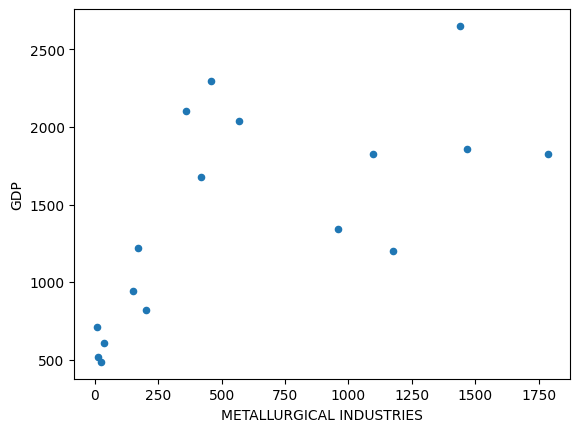

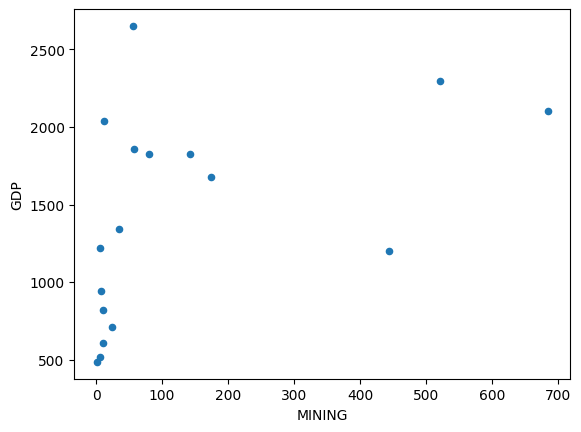

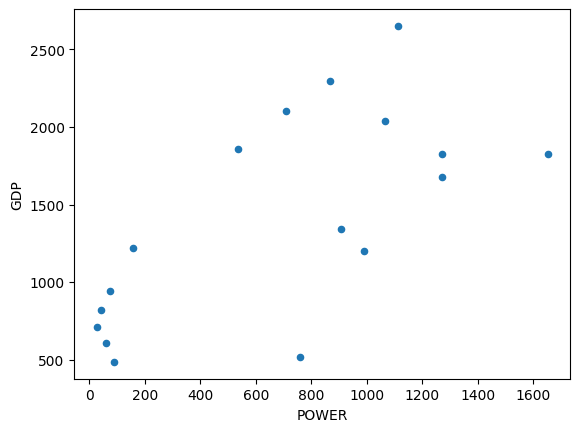

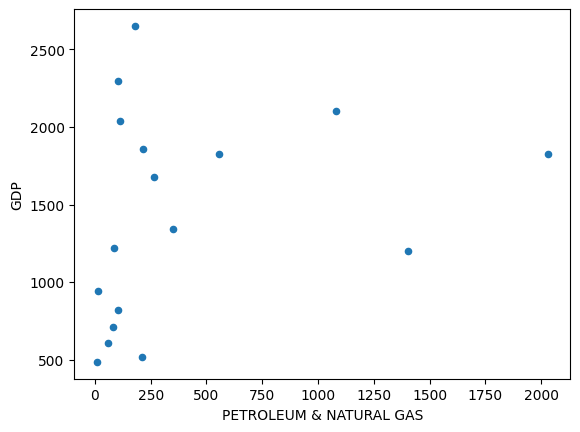

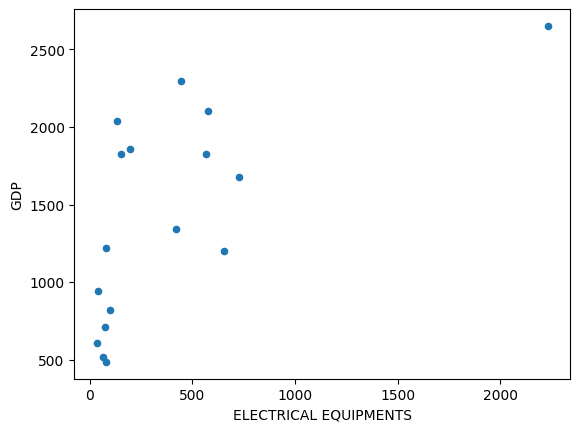

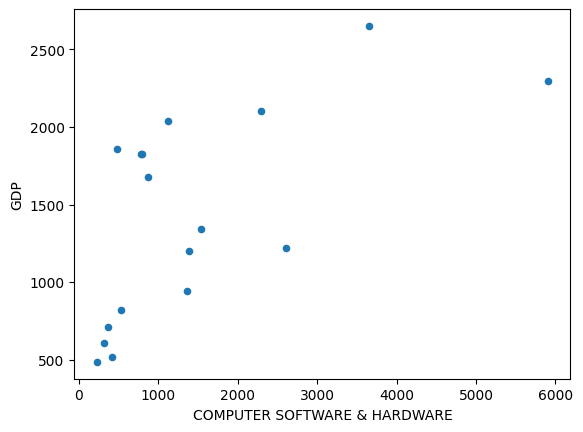

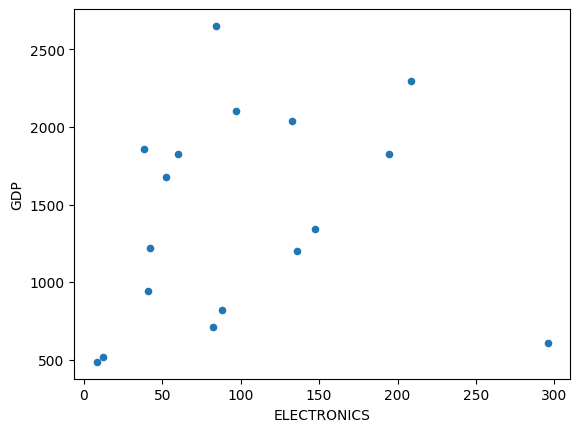

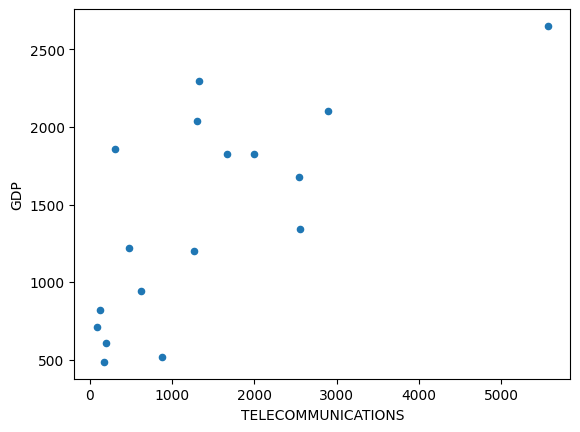

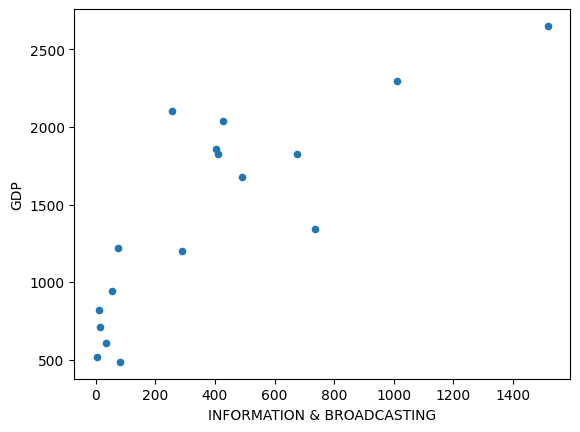

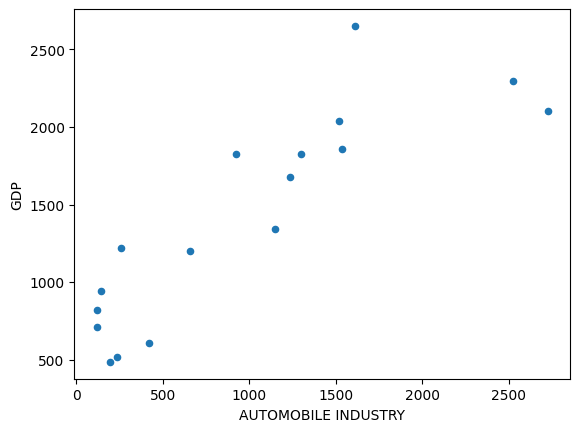

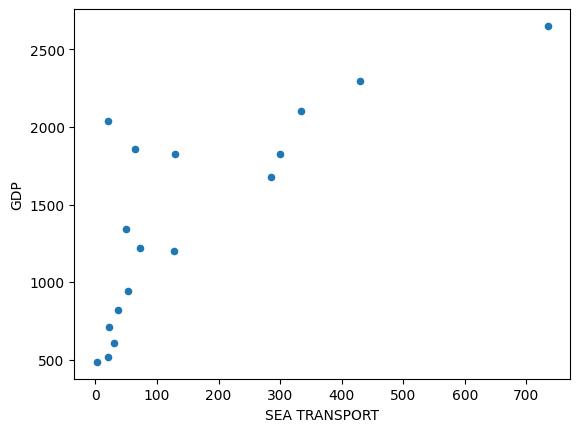

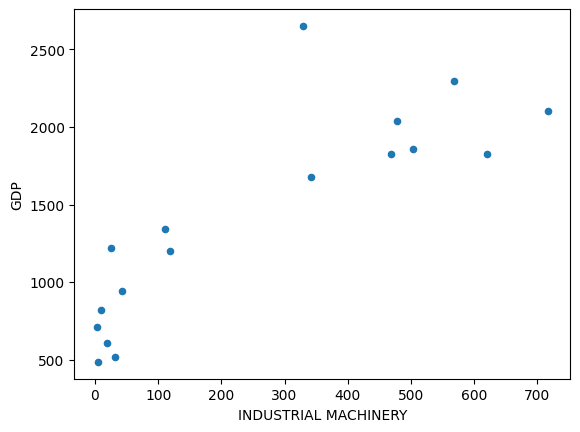

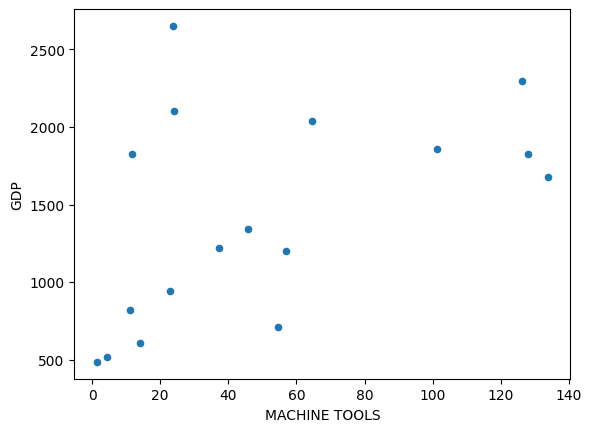

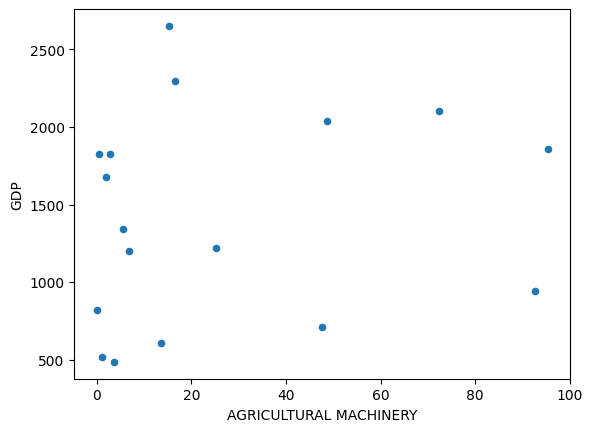

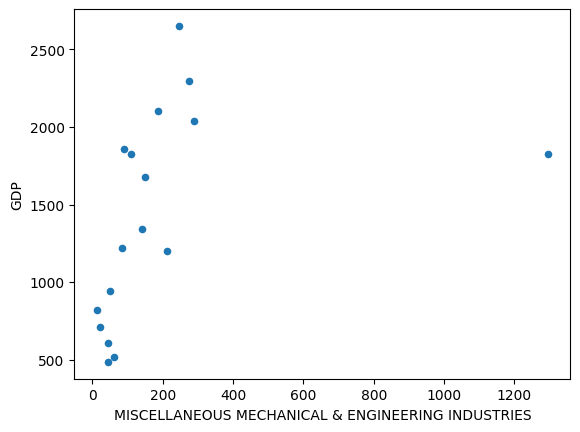

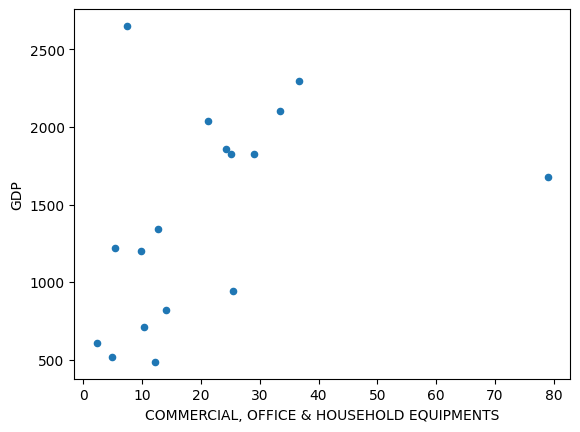

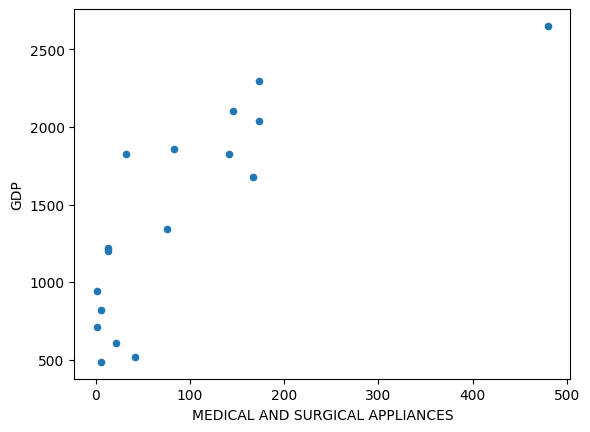

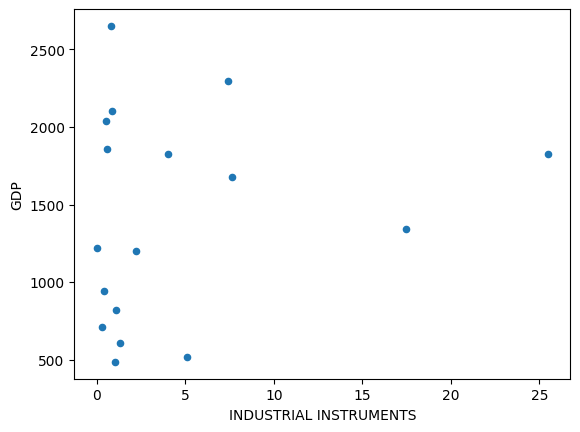

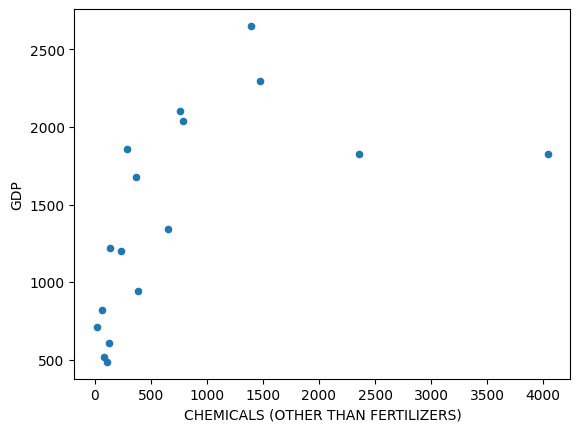

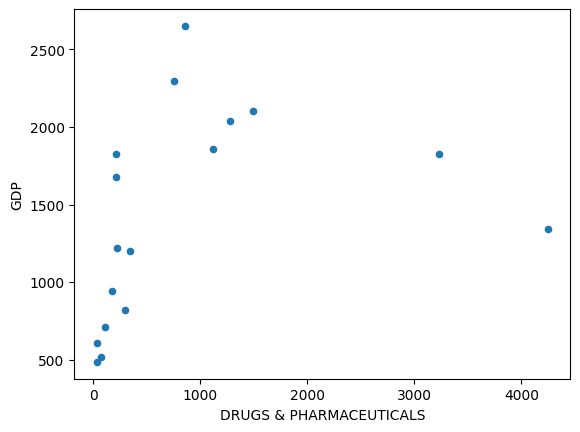

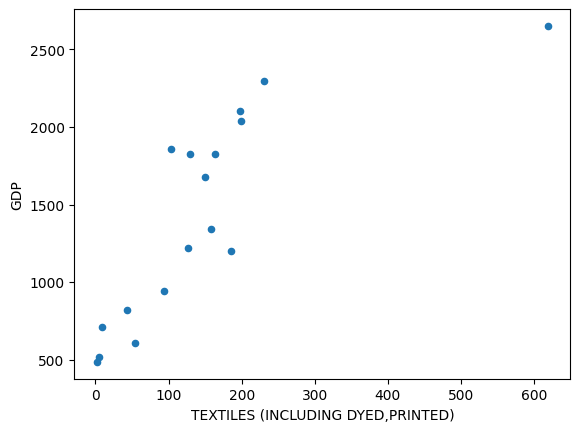

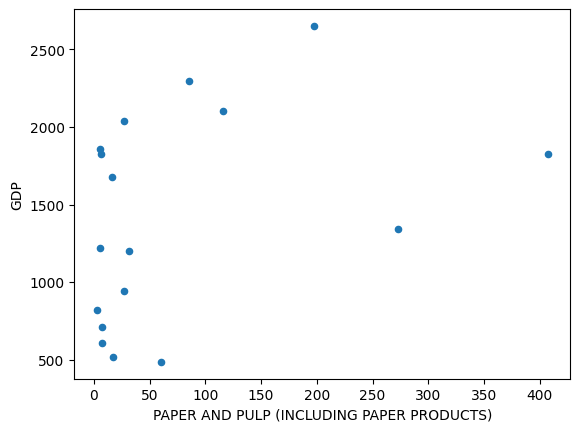

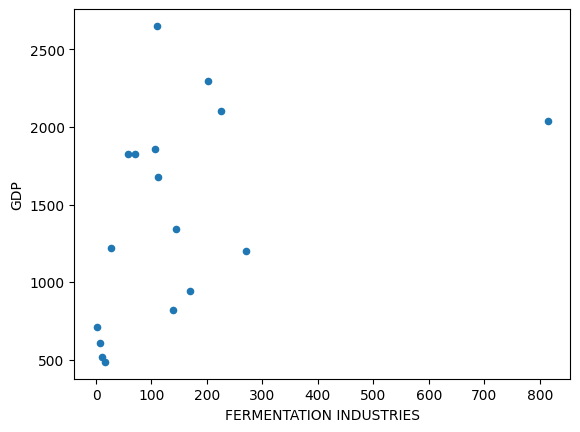

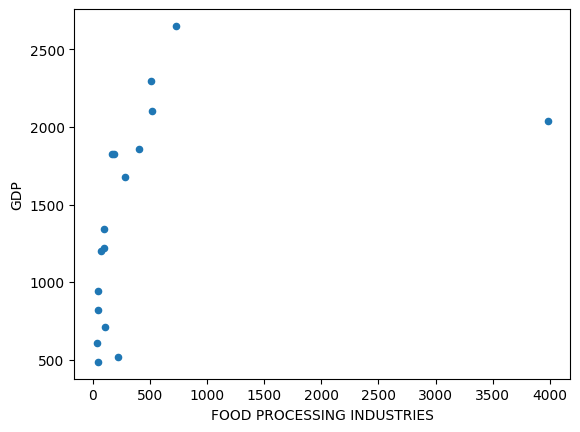

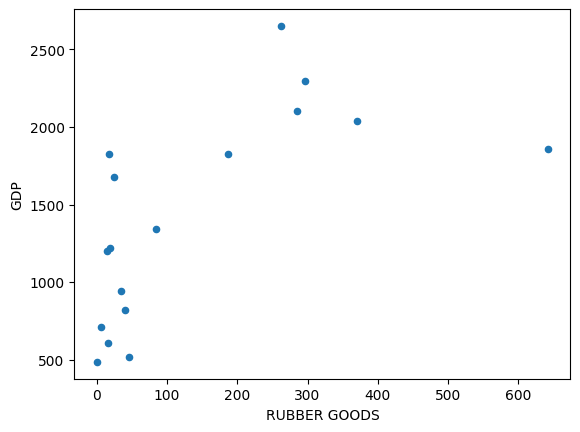

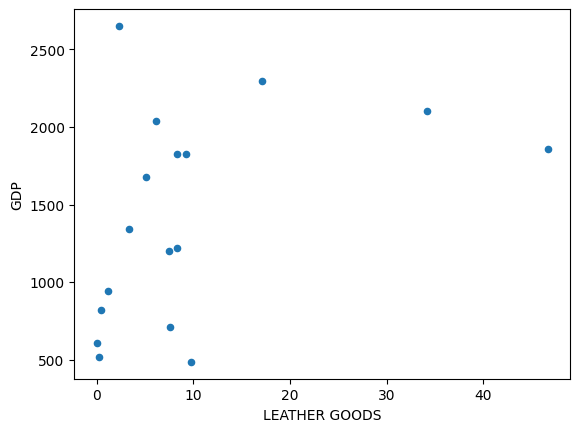

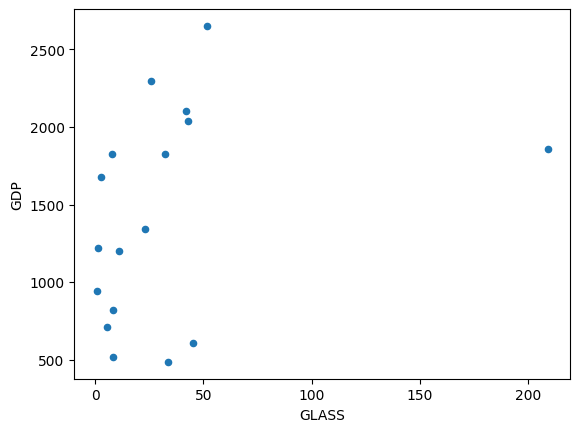

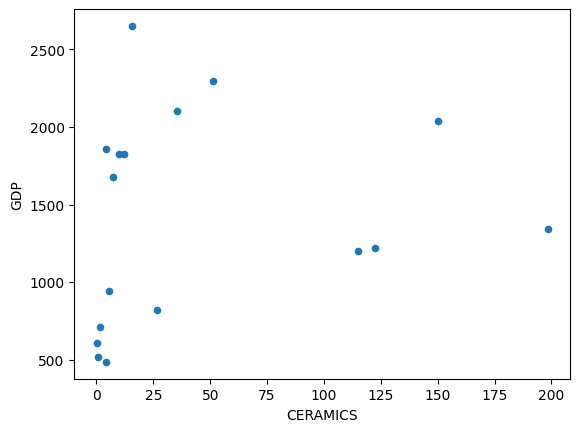

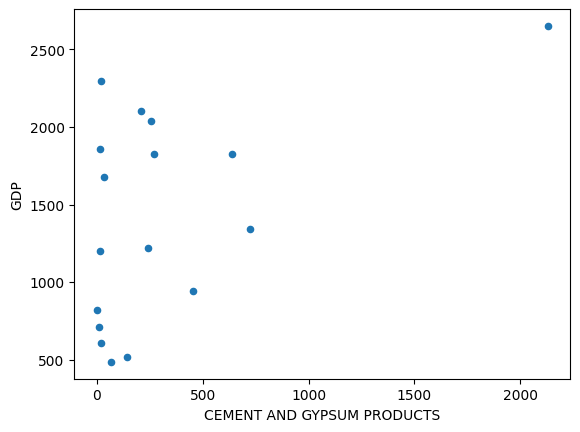

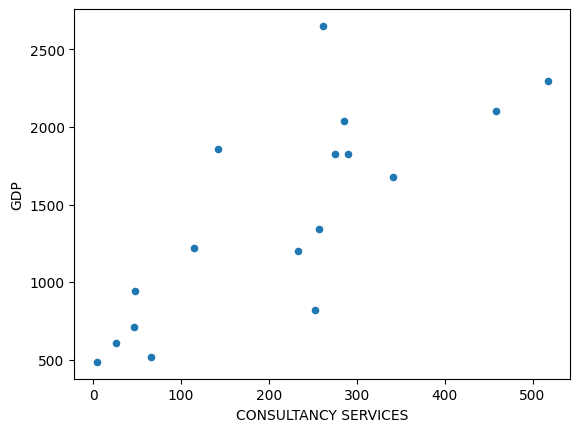

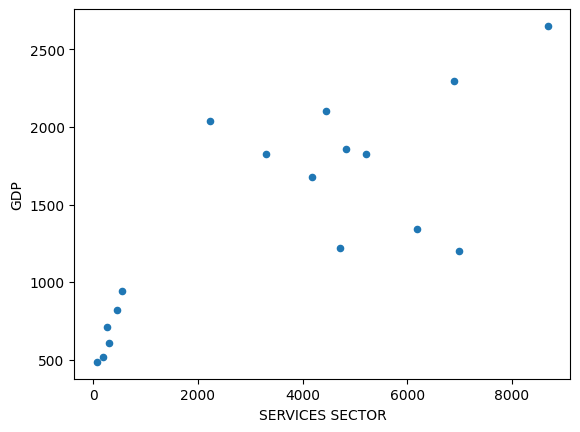

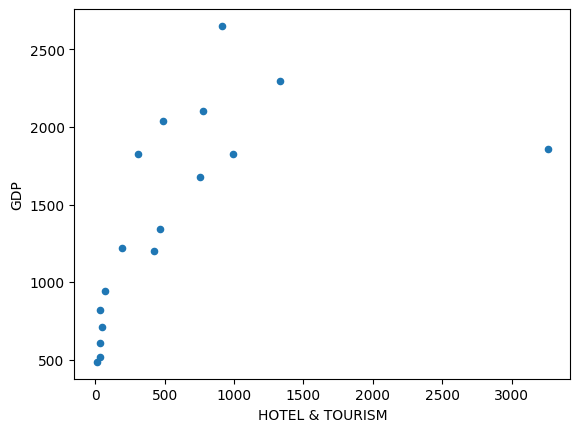

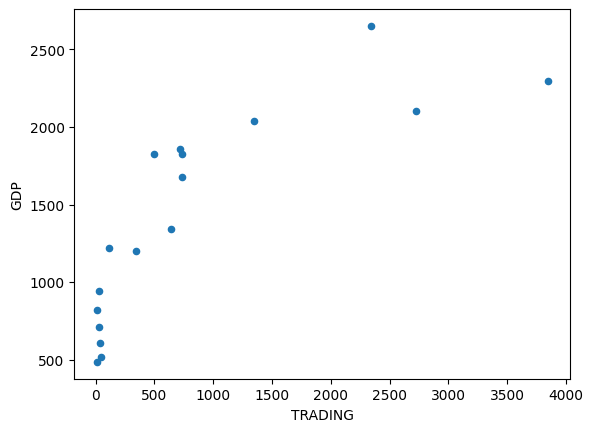

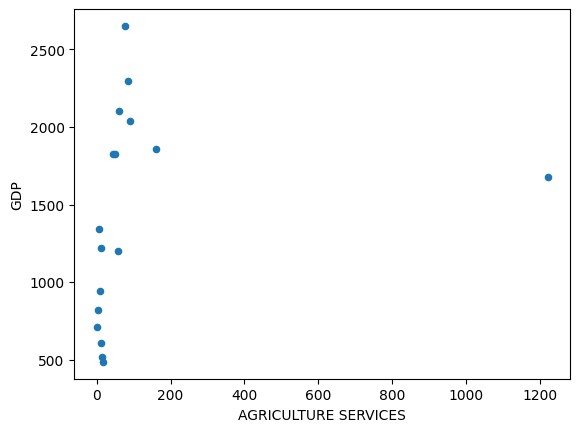

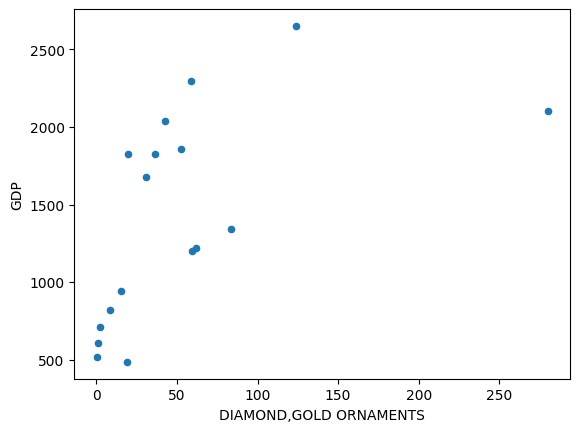

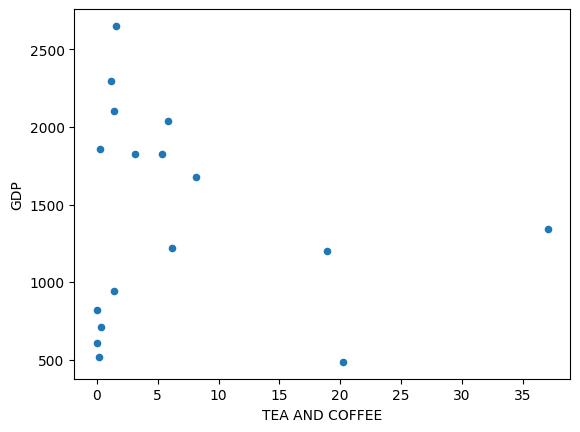

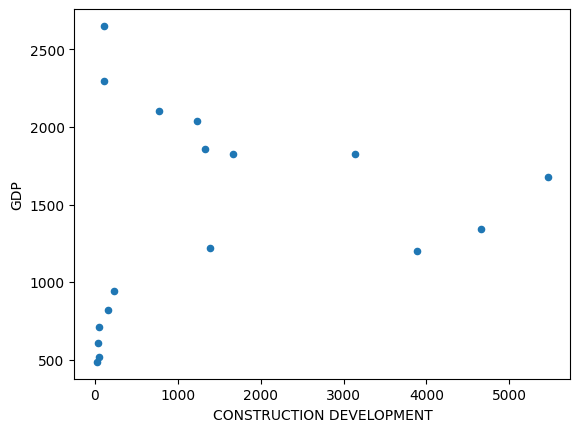

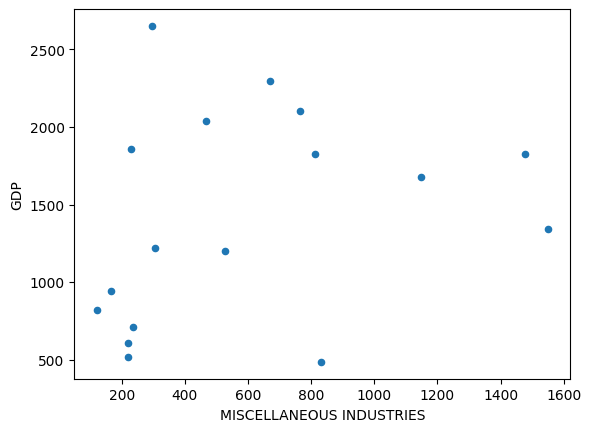

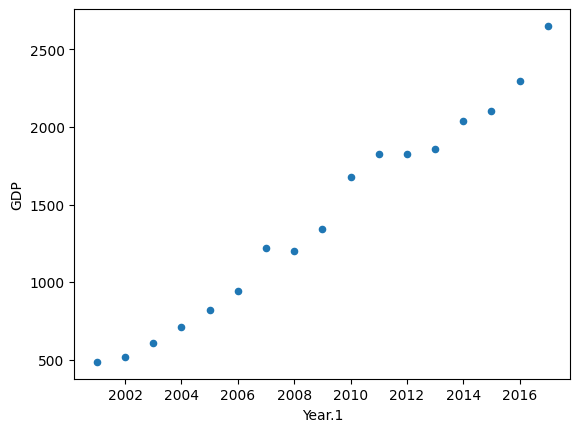

In [44]:
#Analyzing each sector's FDI w.r.t GDP
for i in gdp_fdi_data:
    if i != 'Year' and i!= 'GDP':
        gdp_fdi_data.plot.scatter(x=i,y='GDP')

By analyzing the below charts we can infer that consultancy sectors,industrial machinery,auto mobile industry,information & broadcasting,
telcommunications had a positive correlation with the GDP
so we can conclude these sectors played a major role in the economy

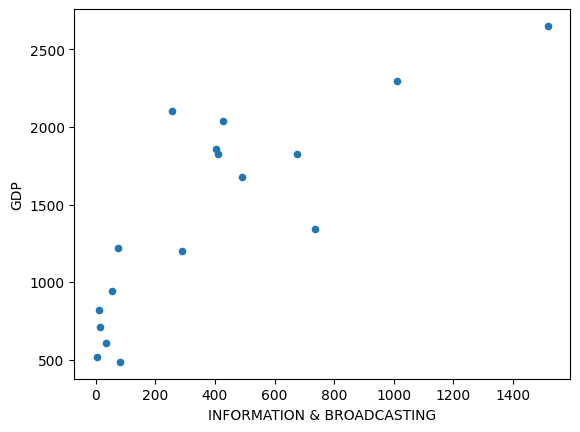

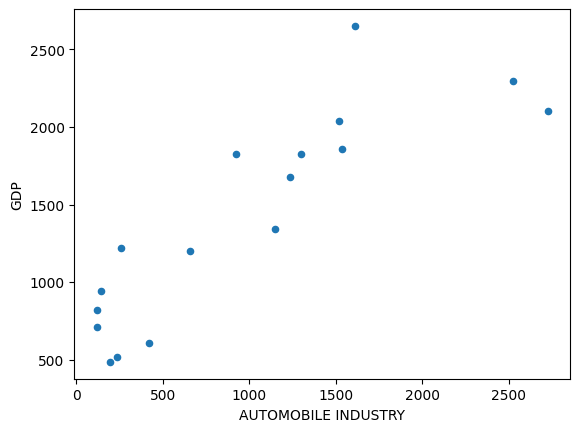

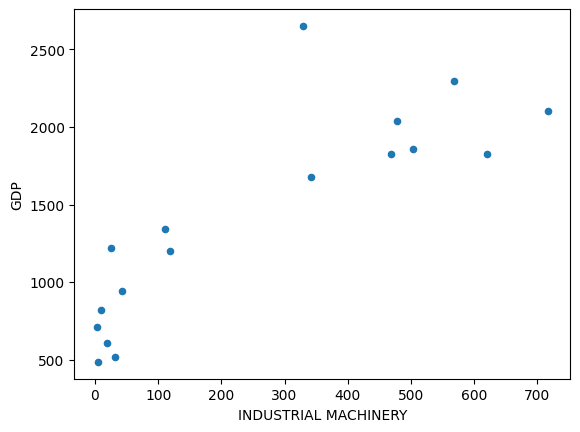

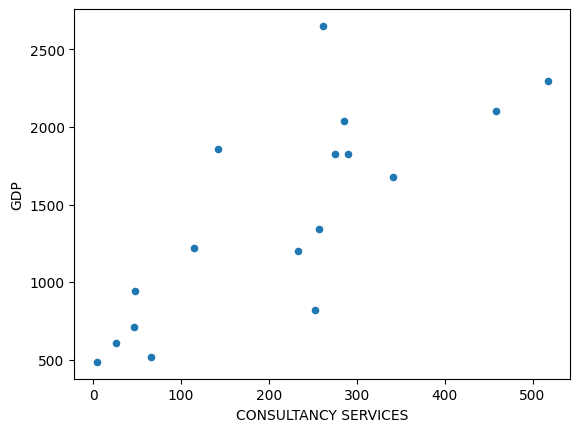

In [45]:
corr_data = ['CONSULTANCY SERVICES','INDUSTRIAL MACHINERY','AUTOMOBILE INDUSTRY','INFORMATION & BROADCASTING']
for i in gdp_fdi_data:
    if i in corr_data:
        gdp_fdi_data.plot.scatter(x=i,y='GDP')